In [84]:
import pandas as pd
import numpy as np
# from FCBF_module import FCBF_module 
# import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
os.environ["OCTAVE_EXECUTABLE"] = "C:\\Octave\\Octave-5.1.0.0\\mingw64\\bin\\octave-cli.exe"
print(os.environ['OCTAVE_EXECUTABLE'])

C:\Octave\Octave-5.1.0.0\mingw64\bin\octave-cli.exe


In [2]:
import parselmouth
from parselmouth.praat import call
# from oct2py import octave
# import matlab.engine
# import nolds
import os, sys

In [3]:
def measurePitch(voiceID, f0min, f0max, unit):
    duration = call(sound, "Get total duration") # duration
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, f0min, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    
    return localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr

In [4]:
sound = parselmouth.Sound('Jack_test.wav')
# sound = parselmouth.Sound("data/Pd1.wav")
jack = measurePitch(sound, 75, 400, "Hertz")
jack = pd.DataFrame(jack).T

In [5]:
jack

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.004727,0.000024,0.002843,0.002578,0.008529,0.035208,0.310103,0.021278,0.020726,0.022213,0.063835,25.385661


In [722]:
jack.to_csv('jack_test.csv')

In [ ]:
from pathlib import Path
 
yang_data = {}
for filename in Path('data/yang').glob('*.wav'):
    yang_data[str(filename)] = np.array(parselmouth.Sound(str(filename)))[0]

In [51]:
nolds.dfa(np.array(sound)[0])

0.0660426359741529

In [8]:
eng = matlab.engine.start_matlab()

In [378]:
eng.addpath(os.path.join(os.getcwd(), 'VoiceAnalysisToolbox', 'VoiceAnalysisToolbox'),nargout=0)
eng.addpath(os.path.join(os.getcwd(), 'data'),nargout=0)

In [730]:
output = eng.voice_analysis('Jack_test.wav')
output = np.array(output)[0]

In [72]:
# octave.addpath(os.path.join(os.getcwd(), 'VoiceAnalysisToolbox', 'VoiceAnalysisToolbox'));

In [664]:
from pathlib import Path
 
yang_data = {}
for filename in Path('data/yang').glob('*.wav'):
    yang_data[str(filename)] = np.array(eng.voice_analysis(str(filename)))[0]

In [662]:
annie_data

{'Pd1.wav': array([ 2.47490978e+00,  1.18475303e+00,  7.89586516e-03,  9.78488504e-06,
         1.48404345e-02,  1.04647518e-02, -3.85556239e-04,  1.48404345e-02,
         1.34653254e-02,  3.64392798e-04,  1.48404345e-02,  1.00963688e+01,
         1.47333033e-01,  1.45574032e-02,  8.66441285e+02,  9.82870797e+03,
        -1.30762578e+02, -2.95290090e+01,  0.00000000e+00,  5.12878164e+01,
         8.17098752e-01,  1.82050394e+02,  4.63314221e-02,  3.26538008e+01,
         2.17764797e-01, -2.71583782e-05,  2.96592507e-01,  2.70352364e-01,
        -5.12587615e-05,  2.96592507e-01,  3.23458655e-01,  8.32169318e-06,
         2.96592507e-01,  4.69813906e-02,  2.72964921e+00,  2.46464019e-01,
         1.31693283e-02,  2.39390003e-02, -2.29667968e-02, -7.07124168e-03,
        -1.13411767e-04,  7.06763495e-03,  9.86809561e-01,  3.00344318e-02,
         1.56604844e+01,  3.69226094e+00,  8.04533398e-02,  3.02444138e-01,
         7.41124260e-01,  5.52695759e+01,  1.01916773e+01,  9.33543389e-01,
 

In [663]:
# f = open("annie+jack.pkl","wb")
# pickle.dump(annie_data ,f)
# f.close()

In [43]:
import pickle
output = []
with (open("annie+jack.pkl", "rb")) as openfile:
    while True:
        try:
            output.append(pickle.load(openfile))
        except EOFError:
            break

In [649]:
# f = open("annie.pkl","wb")
# pickle.dump(annie_data ,f)
# f.close()

In [657]:
# file = open("yang.pkl",'rb')
# f = pickle.load(file)
# file.close()

In [409]:
# import pickle
# f = open("annie.pkl","wb")
# pickle.dump(annie_data,f)
# f.close()

In [410]:
# output = eng.voice_analysis("jack_a.wav")
# output = np.array(output)[0]

In [53]:
from scipy.io import loadmat
names = loadmat('measures_names.mat')

In [19]:
# np.save('output', output)
# out_put = np.load('output.npy')

In [54]:
name_list = []
for name in dict(names)['measures_names'][0]:
    name_list.append(name[0])

In [55]:
df_jack = pd.DataFrame([name_list, output])
df_jack.columns = df_jack.iloc[0]
df_jack = df_jack.drop(df_jack.index[0]).reset_index(drop=True)

In [56]:
jack = pd.concat([jack.T, df_jack.loc[0,['NHR_mean','HNR_mean', 'RPDE', 'DFA', 'PPE']]], axis=0).T
jack = jack.astype(float)
# localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr

In [58]:
jack.head()

,0,1,2,3,4,5,6,7,8,9,10,11,NHR_mean,HNR_mean,RPDE,DFA,PPE
0,0.004727,0.000022,0.002824,0.002775,0.008471,0.048975,0.426846,0.027498,0.030792,0.034791,0.082494,17.114632,0.080453,15.660484,0.576004,0.658519,0.223687


In [310]:
list(df_jack.columns)

['Jitter->F0_abs_dif',
 'Jitter->F0_dif_percent',
 'Jitter->F0_PQ3_classical_Schoentgen',
 'Jitter->F0_PQ3_classical_Baken',
 'Jitter->F0_PQ3_generalised_Schoentgen',
 'Jitter->F0_PQ5_classical_Schoentgen',
 'Jitter->F0_PQ5_classical_Baken',
 'Jitter->F0_PQ5_generalised_Schoentgen',
 'Jitter->F0_PQ11_classical_Schoentgen',
 'Jitter->F0_PQ11_classical_Baken',
 'Jitter->F0_PQ11_generalised_Schoentgen',
 'Jitter->F0_abs0th_perturb',
 'Jitter->F0_DB',
 'Jitter->F0_CV',
 'Jitter->F0_TKEO_mean',
 'Jitter->F0_TKEO_std',
 'Jitter->F0_TKEO_prc5',
 'Jitter->F0_TKEO_prc25',
 'Jitter->F0_TKEO_prc75',
 'Jitter->F0_TKEO_prc95',
 'Jitter->F0_FM',
 'Jitter->F0range_5_95_perc',
 'Shimmer->F0_abs_dif',
 'Shimmer->F0_dif_percent',
 'Shimmer->F0_PQ3_classical_Schoentgen',
 'Shimmer->F0_PQ3_classical_Baken',
 'Shimmer->F0_PQ3_generalised_Schoentgen',
 'Shimmer->F0_PQ5_classical_Schoentgen',
 'Shimmer->F0_PQ5_classical_Baken',
 'Shimmer->F0_PQ5_generalised_Schoentgen',
 'Shimmer->F0_PQ11_classical_Schoentge

In [94]:
X.head()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [68]:
dict(zip(df_jack.columns, range(len(df_jack.columns))))

{'Jitter->F0_abs_dif': 0,
 'Jitter->F0_dif_percent': 1,
 'Jitter->F0_PQ3_classical_Schoentgen': 2,
 'Jitter->F0_PQ3_classical_Baken': 3,
 'Jitter->F0_PQ3_generalised_Schoentgen': 4,
 'Jitter->F0_PQ5_classical_Schoentgen': 5,
 'Jitter->F0_PQ5_classical_Baken': 6,
 'Jitter->F0_PQ5_generalised_Schoentgen': 7,
 'Jitter->F0_PQ11_classical_Schoentgen': 8,
 'Jitter->F0_PQ11_classical_Baken': 9,
 'Jitter->F0_PQ11_generalised_Schoentgen': 10,
 'Jitter->F0_abs0th_perturb': 11,
 'Jitter->F0_DB': 12,
 'Jitter->F0_CV': 13,
 'Jitter->F0_TKEO_mean': 14,
 'Jitter->F0_TKEO_std': 15,
 'Jitter->F0_TKEO_prc5': 16,
 'Jitter->F0_TKEO_prc25': 17,
 'Jitter->F0_TKEO_prc75': 18,
 'Jitter->F0_TKEO_prc95': 19,
 'Jitter->F0_FM': 20,
 'Jitter->F0range_5_95_perc': 21,
 'Shimmer->F0_abs_dif': 22,
 'Shimmer->F0_dif_percent': 23,
 'Shimmer->F0_PQ3_classical_Schoentgen': 24,
 'Shimmer->F0_PQ3_classical_Baken': 25,
 'Shimmer->F0_PQ3_generalised_Schoentgen': 26,
 'Shimmer->F0_PQ5_classical_Schoentgen': 27,
 'Shimmer->F0_P

In [418]:
# df_jack = pd.DataFrame([name_list, annie_data['Pd1.wav']])
# df_jack.columns = df_jack.iloc[0]
# df_jack = df_jack.drop(df_jack.index[0]).reset_index(drop=True)

In [706]:
# jack.dtypes

In [420]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [64]:
# correlation between response and features
df.loc[:,'total_UPDRS':].corr()['total_UPDRS']

total_UPDRS      1.000000
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
Jitter:DDP       0.064027
Shimmer          0.092141
Shimmer(dB)      0.098790
Shimmer:APQ3     0.079363
Shimmer:APQ5     0.083467
Shimmer:APQ11    0.120838
Shimmer:DDA      0.079363
NHR              0.060952
HNR             -0.162117
RPDE             0.156897
DFA             -0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

In [6]:
# parkinson dataset for training
df = pd.read_csv('parkinsons_updrs.data')

In [794]:
# df = df.groupby('subject#').apply(lambda x: x.sample(10)).reset_index(drop=True)

In [7]:
df = df.loc[:, 'total_UPDRS':'HNR']
df = df.drop('NHR', axis=1)

In [8]:
df.shape

(5875, 13)

In [9]:
from pathlib import Path

df_pred = pd.DataFrame(columns=['Method', 'MAE', 'Prediction'])
data = pd.DataFrame()

for filename in Path('data').glob('*.wav'):
    
    filename = str(filename)
    annie_file = filename[filename.rfind('\\')+1:]
    
    sound = parselmouth.Sound(filename)
    jack = measurePitch(sound, 75, 400, "Hertz")
    jack = pd.DataFrame(jack).T
    data = data.append(jack)
    
data.insert(0, 'total_UPDRS', 0)

In [10]:
df.shape, data.shape

((5875, 13), (23, 13))

In [773]:
data.to_csv('test_data.csv')

In [763]:
# data.insert(0, 'total_UPDRS', 0)
data.columns = df.columns
df = df.append(data, ignore_index=True)

In [764]:
df.shape

(5898, 13)

In [765]:
df['UPDRS_cat'] = pd.cut(df.total_UPDRS, [-1,5,10,15,20,25,30,35,40,45,50,55], labels=['0-5', '5-10', '10-15', '15-20','20-25',
                                                '25-30','30-35','35-40','40-45','45-50','50-55'])

In [766]:
df = df.groupby('UPDRS_cat').apply(lambda x: x.sample(20)).reset_index(drop=True)

In [770]:
df.to_csv('smaller_data_balanced.csv')

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\Jack\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
# dropping all the features we cannot get for now
X = df.loc[:,'Jitter(%)':'HNR']

y = df.total_UPDRS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
jack = ss.transform(jack)

In [14]:
jack.shape, X.shape

((1, 12), (5875, 12))

In [110]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

In [74]:
def build_model():
    model = keras.Sequential([
    layers.Dense(10, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
    layers.Dense(10, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [75]:
model = build_model()

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.save('tf_model.h5')

In [111]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model('tf_model.h5')

In [89]:
np.mean(np.abs(model.predict(X_test).reshape(-1)-y_test))

7.649831014123024

In [90]:
model.predict(jack)

array([[-108.229866]], dtype=float32)

In [236]:
# pca = PCA(n_components=1)
# X_trans = pca.fit_transform(X_train.loc[:,'Jitter(%)':'Shimmer:DDA'])
# X_train = pd.concat([pd.DataFrame(X_trans).reset_index(drop=True, inplace=True), X_train.loc[:,'NHR':]], ignore_index=True, axis=1)

In [238]:
# X_trans = pca.fit_transform(X_test.loc[:,'Jitter(%)':'Shimmer:DDA'])
# X_test = pd.concat([pd.DataFrame(X_trans).reset_index(drop=True, inplace=True), X_test.loc[:,'NHR':]], ignore_index=True, axis=1)

In [245]:
# X_trans = pca.fit_transform(jack.iloc[:,0:10])
# jack = pd.concat([pd.DataFrame(X_trans).reset_index(drop=True, inplace=True), jack.loc[:,'NHR_mean':]], ignore_index=True, axis=1)

C:\Users\Jack\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [708]:
df.to_csv('UPDRS_cat.csv')

In [706]:
df.UPDRS_cat.value_counts()

25-30    1153
30-35     937
20-25     912
15-20     769
35-40     591
40-45     562
10-15     316
45-50     231
0-5       230
50-55     213
5-10      191
Name: UPDRS_cat, dtype: int64

In [704]:
logit = LogisticRegression(penalty='l2')
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

0.2714640198511166

In [696]:
logit.predict(jack)

array(['0-5'], dtype=object)

In [29]:
lr = LinearRegression().fit(X_train, y_train)

In [30]:
np.mean(np.abs(lr.predict(X_test)-y_test))

8.538291653791216

In [31]:
lr.predict(jack)

array([-26.57938853])

In [32]:
sns.barplot(y=X.columns, x=lr.coef_)

NameError: name 'sns' is not defined

In [33]:
ridge = Ridge(alpha=0.001).fit(X_train, y_train)

In [34]:
np.mean(np.abs(ridge.predict(X_test)-y_test))

8.537337155078122

In [35]:
ridge.predict(jack)

array([-31.80802282])

In [36]:
ridge.coef_

array([ 3.02134765e+00, -1.74160488e+00, -1.28388511e+02, -1.14402872e+00,
        1.27236340e+02, -5.88307326e-02,  2.61058926e+00, -2.58067044e+01,
       -4.41343070e+00,  2.24185831e+00,  2.47867630e+01, -2.79636981e+00])

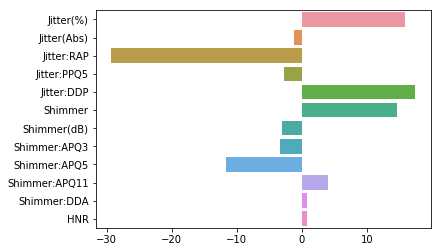

In [348]:
sns.barplot(y=X.columns, x=ridge.coef_)

In [43]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
# model = SelectFromModel(lasso, prefit=True)
# X_new = model.transform(X_train)

C:\Users\Jack\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [306]:
X_new_test = model.transform(X_test)

In [44]:
np.mean(np.abs(lasso.predict(X_test)-y_test))

8.529944523867869

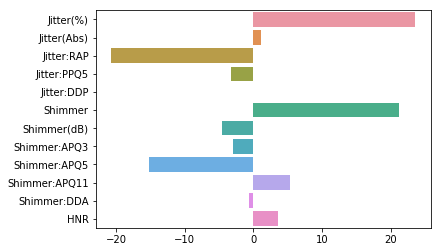

In [308]:
sns.barplot(y=X.columns, x=lasso.coef_)

In [42]:
lasso.predict(jack)

NameError: name 'lasso' is not defined

In [790]:
ridge = Ridge(alpha=0.001).fit(X_new, y_train)

In [791]:
np.mean(np.abs(ridge.predict(model.transform(X_test))-y_test))

AttributeError: 'Variable' object has no attribute 'transform'

In [37]:
rf = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)

In [38]:
np.mean(np.abs(rf.predict(X_test)-y_test))

7.586312102981408

In [39]:
rf.predict(jack)

array([17.6380664])

In [99]:
X.columns

Index(['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'HNR'],
      dtype='object')

In [100]:
rf.feature_importances_

array([0.08494547, 0.13838799, 0.04359886, 0.09131897, 0.05146226,
       0.06012184, 0.0649833 , 0.04784395, 0.07554107, 0.10266817,
       0.05248123, 0.18664689])

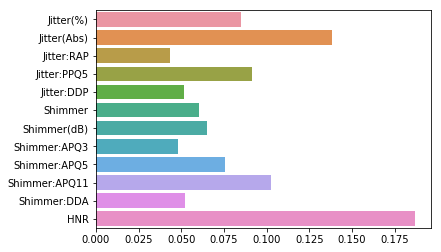

In [101]:
sns.barplot(y=X.columns, x=rf.feature_importances_)

In [102]:
import lightgbm as lgb

In [315]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('The mean absolute error of prediction is:', mean_absolute_error(y_test, y_pred))
gbm.predict(jack)

Starting training...
[1]	valid_0's l1: 11.3438	valid_0's l2: 199.584
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 11.0811	valid_0's l2: 189.021
[3]	valid_0's l1: 10.8544	valid_0's l2: 180.027
[4]	valid_0's l1: 10.6297	valid_0's l2: 171.61
[5]	valid_0's l1: 10.4302	valid_0's l2: 164.265
[6]	valid_0's l1: 10.2494	valid_0's l2: 157.65
[7]	valid_0's l1: 10.0626	valid_0's l2: 151.238
[8]	valid_0's l1: 9.88962	valid_0's l2: 145.449
[9]	valid_0's l1: 9.73103	valid_0's l2: 140.227
[10]	valid_0's l1: 9.58282	valid_0's l2: 135.498
[11]	valid_0's l1: 9.44242	valid_0's l2: 131.179
[12]	valid_0's l1: 9.31421	valid_0's l2: 127.266
[13]	valid_0's l1: 9.1906	valid_0's l2: 123.658
[14]	valid_0's l1: 9.07756	valid_0's l2: 120.45
[15]	valid_0's l1: 8.97023	valid_0's l2: 117.609
[16]	valid_0's l1: 8.85986	valid_0's l2: 114.651
[17]	valid_0's l1: 8.76048	valid_0's l2: 112.191
[18]	valid_0's l1: 8.67189	valid_0's l2: 110.071
[19]	valid_0's l1: 8.59205	valid_0's l2: 108.126


array([24.24222903])

In [104]:
# train
gbm = lgb.LGBMRegressor(num_leaves=100,
                        learning_rate=0.05,
                        n_estimators=10,
                        lambda_l1=2)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The mean absolute error of prediction is:', mean_absolute_error(y_test, y_pred))

# feature importances
print('Feature importances:', list(gbm.feature_importances_))

[1]	valid_0's l1: 8.75017	valid_0's l2: 115.603
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 8.68917	valid_0's l2: 114.093
[3]	valid_0's l1: 8.62745	valid_0's l2: 112.623
[4]	valid_0's l1: 8.57749	valid_0's l2: 111.386
[5]	valid_0's l1: 8.53023	valid_0's l2: 110.159
[6]	valid_0's l1: 8.4869	valid_0's l2: 109.137
[7]	valid_0's l1: 8.45177	valid_0's l2: 108.332
[8]	valid_0's l1: 8.40979	valid_0's l2: 107.483
[9]	valid_0's l1: 8.37871	valid_0's l2: 106.826
[10]	valid_0's l1: 8.34333	valid_0's l2: 106.179
Did not meet early stopping. Best iteration is:
[10]	valid_0's l1: 8.34333	valid_0's l2: 106.179
Starting predicting...
The mean absolute error of prediction is: 8.343328184772853
Feature importances: [84, 152, 61, 121, 23, 48, 67, 97, 79, 110, 11, 137]


In [105]:
gbm.predict(jack)

array([28.04144588])

In [107]:
nn = MLPRegressor()
nn.fit(X_train, y_train)
np.mean(np.abs(nn.predict(X_test)-y_test))

8.473808840041848

In [108]:
nn.predict(jack)

array([30.25559406])

In [109]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.predict(jack)

array([32.8966])

### CNTK

In [454]:
import cntk as C
import cntk.tests.test_utils

C:\Users\Jack\Anaconda3\lib\site-packages\cntk\cntk_py_init.py:84: UserWarning: 

################################################ Missing optional dependency (GPU-Specific) ################################################
   CNTK may crash if the component that depends on those dependencies is loaded.
   Visit https://docs.microsoft.com/en-us/cognitive-toolkit/Setup-Windows-Python#optional-gpu-specific-packages for more information.
############################################################################################################################################
If you intend to use CNTK without GPU support, you can ignore the (likely) GPU-specific warning!
############################################################################################################################################

  warnings.warn(WARNING_MSG_GPU_ONLY % ('GPU-Specific', 'https://docs.microsoft.com/en-us/cognitive-toolkit/Setup-Windows-Python#optional-gpu-specific-packages'))


In [618]:
X_train.shape, y_train.shape

((4090, 12), (4090,))

In [619]:
y_train = y_train.values

In [620]:
y_train = y_train.reshape(y_train.shape[0],1)

In [637]:
features = C.input_variable(12)
label = C.input_variable(1)
model = C.layers.Sequential([C.layers.Dense(10, activation=C.relu), 
                             C.layers.Dense(10, activation=C.relu), C.layers.Dense(1)])(features)
loss = C.squared_error(model, label)
result = model(features)

In [638]:
learner = C.sgd(model.parameters,
                C.learning_parameter_schedule(0.1))
progress_writer = C.logging.ProgressPrinter(0)

trainer = C.Trainer(result, loss, [learner])
trainer.train_minibatch({features: X_train, label: y_train})

 average      since    average      since      examples
    loss       last     metric       last              
 ------------------------------------------------------


C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input7975") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:82: RuntimeWarning: data is not C contiguous; rearrange your data/computation to avoid costly data conversions
  RuntimeWarning)
C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input7976") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


True

In [639]:
np.mean(np.abs(trainer.model.eval(X_test).reshape(-1)-y_test))

C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input7975") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:82: RuntimeWarning: data is not C contiguous; rearrange your data/computation to avoid costly data conversions
  RuntimeWarning)


22.649319903367573

In [550]:
mean = 10
stdev = 2 
x = np.random.normal(mean, stdev, 1000)
y = 2 * x + 25

inputs = C.input_variable(1) #Number of variables
labels = C.input_variable(1) #Number of results
layer1 = C.layers.Dense(100, activation = C.relu) #input layer with 1000 neurons
layer2 = C.layers.Dense(100, activation = C.relu) #hidden layer with 1000 neurons
layer3 = C.layers.Dense(1, activation = None) #output layer with 1 neuron
model1 = C.layers.Sequential([layer1, layer2, layer3])
result = model1(inputs)
loss = C.squared_error(result, labels)
learner = C.sgd(model1.parameters, C.learning_parameter_schedule(0.01))
progress_writer = C.logging.ProgressPrinter(0) 

 average      since    average      since      examples
    loss       last     metric       last              
 ------------------------------------------------------


In [552]:
x = x.reshape(1000,1)
y = y.reshape(1000,1)
trainer = C.Trainer(result, loss, [learner])
trainer.train_minibatch({inputs: x, labels: y})

C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4462") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4463") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


True

In [562]:
dir(trainer.model)

['_ProgressCollector',
 '__abs__',
 '__add__',
 '__call__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__disown__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__swig_destroy__',
 '__swig_getmethods__',
 '__swig_setmethods__',
 '__truediv__',
 '__weakref__',
 '_backward',
 '_deserialize',
 '_deserializer',
 '_forward',
 '_get_or_reset_custom_attributes',
 '_infer_outputs',
 '_placeholders_under_construction',
 '_replace_args_type_check',
 '_s',
 '_sanitize_check_Function',
 '_serialize_impl',
 '_to_Fun

In [566]:
trainer.model.eval(x)

C:\Users\Jack\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4462") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


array([[ 838.12177],
       [ 606.9196 ],
       [ 479.54025],
       [ 837.68964],
       [ 832.5358 ],
       [ 758.0389 ],
       [ 674.51434],
       [ 562.76697],
       [ 862.9046 ],
       [ 853.65155],
       [ 374.6837 ],
       [ 583.0605 ],
       [ 663.9653 ],
       [ 740.80206],
       [ 465.13617],
       [ 775.1882 ],
       [ 573.75433],
       [ 929.0035 ],
       [ 752.103  ],
       [ 730.3945 ],
       [ 534.6678 ],
       [ 568.7215 ],
       [ 687.33026],
       [ 761.53143],
       [ 886.4226 ],
       [ 744.47235],
       [ 802.5172 ],
       [ 619.2801 ],
       [ 496.21213],
       [ 478.28537],
       [ 485.10947],
       [ 772.88916],
       [ 901.384  ],
       [ 784.50494],
       [ 816.23895],
       [ 695.3764 ],
       [ 637.5053 ],
       [ 444.66867],
       [ 805.9074 ],
       [ 541.886  ],
       [ 835.8599 ],
       [ 449.6169 ],
       [ 633.702  ],
       [ 674.90643],
       [ 801.42053],
       [ 584.74176],
       [ 836.26013],
       [ 686.

## Get Real Prediction

In [490]:
from itertools import repeat

In [ ]:
sound = parselmouth.Sound("data/Pd1.wav")
jack = measurePitch(sound, 75, 400, "Hertz")
jack = pd.DataFrame(jack).T

df_jack = pd.DataFrame([name_list, annie_data['Pd1.wav']])
df_jack.columns = df_jack.iloc[0]
df_jack = df_jack.drop(df_jack.index[0]).reset_index(drop=True)

jack = pd.concat([jack.T, df_jack.loc[0,['NHR_mean','HNR_mean', 'RPDE', 'DFA', 'PPE']]], axis=0).T
jack = jack.astype(float)

In [92]:
from pathlib import Path

df_pred = pd.DataFrame(columns=['Method', 'MAE', 'Prediction'])
data = pd.DataFrame()

for filename in Path('data').glob('*.wav'):
    
    filename = str(filename)
    annie_file = filename[filename.rfind('\\')+1:]
    
    sound = parselmouth.Sound(filename)
    jack = measurePitch(sound, 75, 400, "Hertz")
    jack = pd.DataFrame(jack).T
    data = data.append(jack)

# #     try:
# #         df_jack = pd.DataFrame([name_list, annie_data['data\\yang\\'+annie_file]])
# #     except:
# #         df_jack = pd.DataFrame([name_list, annie_data[annie_file]])
# #     df_jack.columns = df_jack.iloc[0]
# #     df_jack = df_jack.drop(df_jack.index[0]).reset_index(drop=True)

#     jack = pd.concat([jack.T, df_jack.loc[0,['NHR_mean','HNR_mean', 'RPDE', 'DFA', 'PPE']]], axis=0).T
#     jack = jack.astype(float)
#     final_annie_data.append(jack)
    
    ss.transform(jack)
    
    mae = []
    pred = []
#     lr = LinearRegression().fit(X_train, y_train)
    mae.append(np.mean(np.abs(lr.predict(X_test)-y_test)))
    pred.append(lr.predict(jack))

#     ridge = Ridge(alpha=0.1).fit(X_train, y_train)
    mae.append(np.mean(np.abs(ridge.predict(X_test)-y_test)))
    pred.append(ridge.predict(jack))

#     lasso = Lasso(alpha=0.1).fit(X_train, y_train)
#     model = SelectFromModel(lasso, prefit=True)
#     X_new = model.transform(X_train)
#     X_new_test = model.transform(X_test)
    mae.append(np.mean(np.abs(lasso.predict(X_test)-y_test)))
    pred.append(lasso.predict(jack))

# #     ridge = Ridge(alpha=0.1).fit(X_new, y_train)
#     mae.append(np.mean(np.abs(ridge.predict(model.transform(X_test))-y_test)))
#     pred.append(ridge.predict(model.transform(jack)))

#     rf = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
    mae.append(np.mean(np.abs(rf.predict(X_test)-y_test)))
    pred.append(rf.predict(jack))
    
    mae.append(np.mean(np.abs(tf.predict(X_test).reshape(-1)-y_test)))
    pred.append(tf.predict(jack))
    
    methods = ['Linear Regression',
                       'Ridge', 
                       'Lasso',
#                        'Ridge Trans', 
                       'Random Forest',
              'TF']
    df_pred = df_pred.append(pd.DataFrame(np.column_stack([list(np.repeat(annie_file, 5)), methods, mae, pred]), columns=['Sample', 'Method', 'MAE', 'Prediction']),
                  ignore_index=True, sort=False)

In [60]:
np.mean(np.abs(tf.predict(X_test).reshape(-1)-y_test))

28.816871974952655

In [93]:
df_pred

,Method,MAE,Prediction,Sample
0,Linear Regression,8.53829,-26.5794,dad.wav
1,Ridge,8.53734,-31.808,dad.wav
2,Lasso,8.52994,-32.1038,dad.wav
3,Random Forest,7.58631,17.6381,dad.wav
4,TF,7.64983,-105.877,dad.wav
5,Linear Regression,8.53829,9.33212,gma.wav
6,Ridge,8.53734,-10.8777,gma.wav
7,Lasso,8.52994,-13.5702,gma.wav
8,Random Forest,7.58631,17.0969,gma.wav
9,TF,7.64983,-62.3373,gma.wav


In [452]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(ridge, 'ridge_model.pkl') 

['ridge_model.pkl']

In [453]:

ridge = joblib.load('ridge_model.pkl') 

ridge.predict(jack)

array([-29.83627559])

## UCI Multiple Types of Sound Recordings Data Set

In [293]:
df2 = pd.read_csv('train_data.txt', header=None)
df2.columns = range(1,30)

In [294]:
df2_test = pd.read_csv('test_data.txt', header=None)

In [301]:
df2_X = df2.loc[:,2:27]
df2_y = df2[28]

In [302]:
X_train, X_test, y_train, y_test = train_test_split(df2_X, df2_y, test_size=0.33)

In [306]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
np.mean(np.abs(ridge.predict(X_train)-y_train))
np.mean(np.abs(ridge.predict(X_test)-y_test))

12.592242396497298

In [303]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
np.mean(np.abs(rf.predict(X_test)-y_test))

12.370436046511633

In [304]:
rf.feature_importances_

array([0.03333411, 0.03823525, 0.03450666, 0.06129314, 0.03643689,
       0.02505728, 0.03730158, 0.01668821, 0.03763396, 0.08019144,
       0.01815848, 0.0345931 , 0.0459487 , 0.03771743, 0.05728411,
       0.0284624 , 0.04745298, 0.04976384, 0.05188652, 0.03781515,
       0.0363865 , 0.02838698, 0.04626474, 0.0412893 , 0.0063705 ,
       0.03154075])

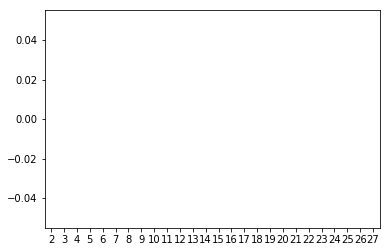

In [99]:
sns.barplot(x=X_train.columns, y=rf.feature_importances_)

In [2]:
import pandas as pd

In [12]:
df = pd.DataFrame({'Date':pd.date_range(start='1/1/2019', end='1/08/2019'),
              'Actuals': [2,7,8,4,1,0,0,0]})
df

,Date,Actuals
0,2019-01-01,2
1,2019-01-02,7
2,2019-01-03,8
3,2019-01-04,4
4,2019-01-05,1
5,2019-01-06,0
6,2019-01-07,0
7,2019-01-08,0


In [33]:
df.Actuals.where(df.Date.lt('2019-01-05'),1)

0    2
1    7
2    8
3    4
4    1
5    1
6    1
7    1
Name: Actuals, dtype: int64

In [22]:
df['Predictions'] = df.Actuals.where(df.Date.lt('2019-01-05')).ffill().astype(int)
df

,Date,Actuals,Predictions
0,2019-01-01,2,2
1,2019-01-02,7,7
2,2019-01-03,8,8
3,2019-01-04,4,4
4,2019-01-05,1,4
5,2019-01-06,0,4
6,2019-01-07,0,4
7,2019-01-08,0,4
